# ENSO Index

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/noaa.ersst.v5/sst.mnmean.nc'
ds = xr.open_dataset(url, drop_variables=['time_bnds'])
ds = ds.sel(time=slice('1950', None)).load()

In [3]:
sst_anom = ds.sst.groupby('time.month') - ds.sst.groupby('time.month').mean(dim='time')

In [7]:
sst_anom

<xarray.DataArray 'sst' (time: 860, lat: 89, lon: 180)>
array([[[ 1.1920929e-06,  1.1920929e-06,  1.1920929e-06, ...,
          1.1920929e-06,  1.1920929e-06,  1.1920929e-06],
        [ 1.1920929e-06,  1.1920929e-06,  1.1920929e-06, ...,
          1.1920929e-06,  1.1920929e-06,  1.1920929e-06],
        [ 1.1920929e-06,  1.1920929e-06,  1.1920929e-06, ...,
          1.1920929e-06,  1.1920929e-06,  1.1920929e-06],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[ 1.1920929e-06,  1.1920929e-06,  1.1920929e-06, ...,
          1.1920929e-06,  1.1920929e-06,  1.1920929e-06],
        [ 1.1920929e-06,  1.1920929e-06,  1.1920929e-06, ...,
          1.1920929e-06,  1.1920929e-06,  1.1920929e-06],
        [ 1.1920929e-06,  1.1920929e-06,  1.1920929e-06, ...,
          1.1920929e-06,  1.1920929e-06,  1.1920929e-06],
...
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[ 1.1920929e-06,  1.1920929e-06,  1.1920929e-06, ...,
          1.1920929e-06,  1.1920929e-06,  1.1920929e-06],
        [ 1.1920929e-06,  1.1920929e-06,  1.1920929e-06, ...,
          1.1920929e-06,  1.1920929e-06,  1.1920929e-06],
        [ 1.1920929e-06,  1.1920929e-06,  1.1920929e-06, ...,
         -1.0848045e-05,  1.1920929e-06,  1.1920929e-06],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2021-08-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 10 11 12 1 2 3 4 5 6 7 8

In [22]:
sst_anom.lon

<xarray.DataArray 'lon' (lon: 180)>
array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
        24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,
        48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,
        72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,
        96.,  98., 100., 102., 104., 106., 108., 110., 112., 114., 116., 118.,
       120., 122., 124., 126., 128., 130., 132., 134., 136., 138., 140., 142.,
       144., 146., 148., 150., 152., 154., 156., 158., 160., 162., 164., 166.,
       168., 170., 172., 174., 176., 178., 180., 182., 184., 186., 188., 190.,
       192., 194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214.,
       216., 218., 220., 222., 224., 226., 228., 230., 232., 234., 236., 238.,
       240., 242., 244., 246., 248., 250., 252., 254., 256., 258., 260., 262.,
       264., 266., 268., 270., 272., 274., 276., 278., 280., 282., 284., 286.,
       288., 290., 292., 294., 296., 298., 300., 302., 304., 306., 308., 310.,
       312., 314., 316., 318., 320., 322., 324., 326., 328., 330., 332., 334.,
       336., 338., 340., 342., 344., 346., 348., 350., 352., 354., 356., 358.],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
Attributes:
    units:               degrees_east
    long_name:           Longitude
    actual_range:        [  0. 358.]
    standard_name:       longitude
    axis:                X
    coordinate_defines:  center

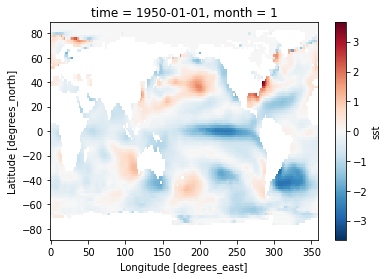

In [25]:
sst_anom[0].plot()

In [28]:
sst_anom.time

<xarray.DataArray 'time' (time: 860)>
array(['1950-01-01T00:00:00.000000000', '1950-02-01T00:00:00.000000000',
       '1950-03-01T00:00:00.000000000', ..., '2021-06-01T00:00:00.000000000',
       '2021-07-01T00:00:00.000000000', '2021-08-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2021-08-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 10 11 12 1 2 3 4 5 6 7 8
Attributes:
    long_name:        Time
    delta_t:          0000-01-00 00:00:00
    avg_period:       0000-01-00 00:00:00
    prev_avg_period:  0000-00-07 00:00:00
    standard_name:    time
    axis:             T
    actual_range:     [19723. 80931.]
    _ChunkSizes:      1

In [26]:
360-170

190

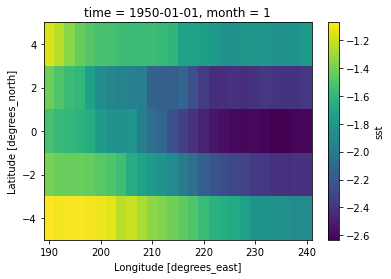

In [27]:
sst_anom.isel(time=0).sel(lat=slice(5,-5)).sel(lon=slice(360-170, 360-120)).plot()

<ipython-input-51-3515ae0dbd5b>:4: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  oni = sst_anom_nino34_mean.rolling(time=3, center=True).mean(dim='time')


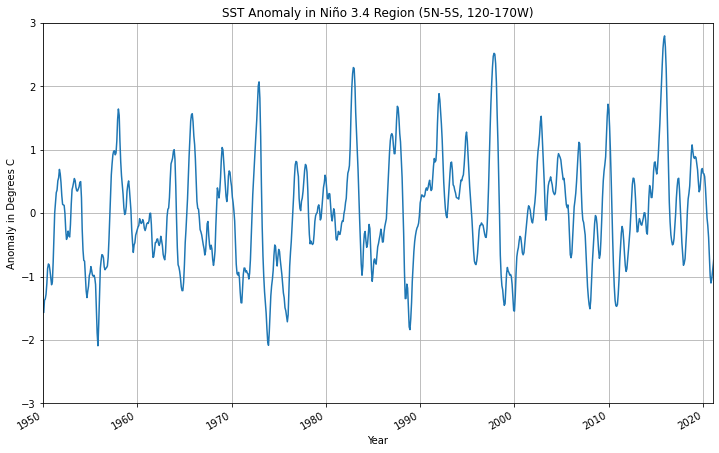

In [51]:
plt.figure(figsize=(12,7))
sst_anom_nino34 = sst_anom.sel(lat=slice(5, -5), lon=slice(360-170, 360-120))
sst_anom_nino34_mean = sst_anom_nino34.mean(dim=('lon', 'lat'))
oni = sst_anom_nino34_mean.rolling(time=3, center=True).mean(dim='time')
plt.grid()
oni.plot()
plt.ylabel('Anomaly in Degrees C')
plt.xlabel('Year')
plt.ylim(-3,3)
plt.xlim('1950', '2021')
plt.title('SST Anomaly in Niño 3.4 Region (5N-5S, 120-170W)');

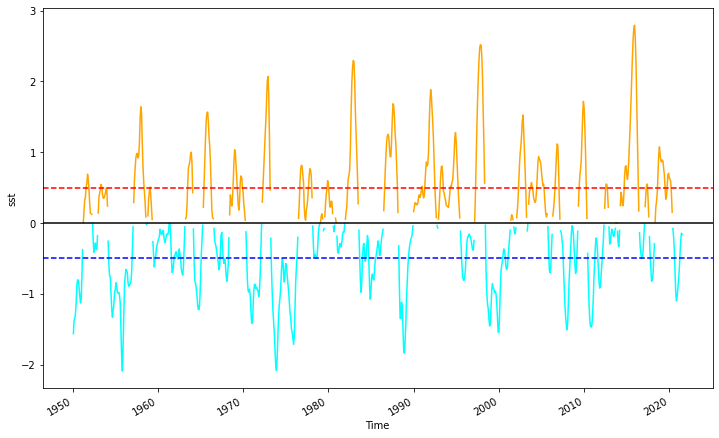

In [57]:
plt.figure(figsize=(12,7))
oni.where(oni>0).plot(color='orange')
oni.where(oni<0).plot(color='cyan')
plt.axhline(y=0, color='k')
plt.axhline(y=0.5, linestyle='--', color='r')
plt.axhline(y=-0.5, linestyle='--', color='b');

TypeError: bar() missing 1 required positional argument: 'height'

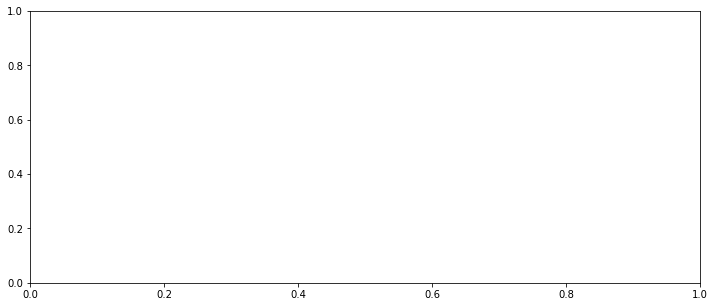

In [33]:
fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.bar(oni.where(oni>0), color='orange')
ax.bar(oni.where(oni<0), color='cyan')

In [30]:
oni_pos = oni > 0

In [5]:
positive_oni = ((oni>0.5).astype('i4').rolling(time=5, center=True).sum()==5)
negative_oni = ((oni<0.5).astype('i4').rolling(time=5, center=True).sum()==5)

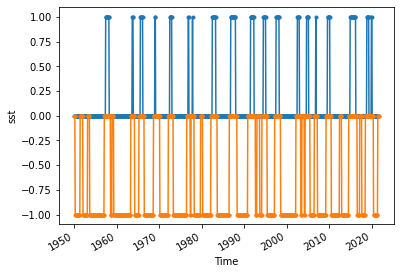

In [6]:
positive_oni.astype('i4').plot(marker='.')
(-negative_oni.astype('i4')).plot(marker='.')

## Save oni so you can use index in indices nb

In [58]:
oni.to_netcdf('oni')